# Edge Detection Project
Run Edge detection using python guide. Then, import roof image and run edge detection methods on roof image.

Edge detection works – roughly – by finding the edges with the most drastic change of light. In math terms this means taking the gradient magnitude of the light values of the pixels and finding local maxima – one way of doing this is setting the second derivative to 0, search for zero-crossings, and selecting the maxima.

## Sobel and Roberts Edge Detection

In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from PIL import Image

from skimage import filters
from skimage.data import camera
from skimage.util import random_noise
from skimage import feature
import skimage

In [2]:
# Get Image and Edges
image = camera()
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

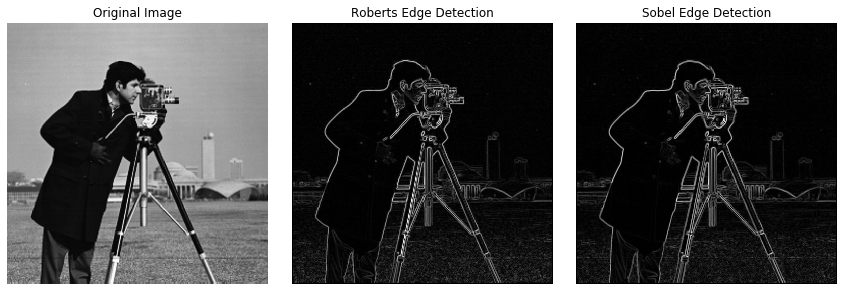

In [3]:
# Display Results
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(12, 4))

axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('Original Image')

axes[1].imshow(edge_roberts, cmap=plt.cm.gray)
axes[1].set_title('Roberts Edge Detection')

axes[2].imshow(edge_sobel, cmap=plt.cm.gray)
axes[2].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

## Canny Filter

In [4]:
# Generate noisy image of a square
image = np.zeros((128, 128), dtype=float)
image[32:-32, 32:-32] = 1
image = ndi.rotate(image, 15, mode='constant')
smooth_image = ndi.gaussian_filter(image, 4)
noisy_image = random_noise(smooth_image, mode='speckle', mean=0.1)

In [5]:
# Compute Canny Filter
edges1 = feature.canny(noisy_image)
edges2 = feature.canny(noisy_image, sigma=3)

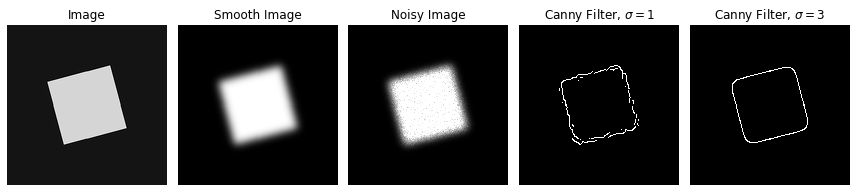

In [6]:
# Display Results
fig, axes = plt.subplots(ncols=5, sharex=True, sharey=True, figsize=(12, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title('Image')

axes[1].imshow(smooth_image, cmap='gray')
axes[1].set_title('Smooth Image')

axes[2].imshow(noisy_image, cmap='gray')
axes[2].set_title('Noisy Image')

axes[3].imshow(edges1, cmap='gray')
axes[3].set_title(r'Canny Filter, $\sigma=1$')

axes[4].imshow(edges2, cmap='gray')
axes[4].set_title(r'Canny Filter, $\sigma=3$')

for ax in axes:
    ax.axis('off')

fig.tight_layout()
plt.show()

# Edge Detection On Roof Image

In [7]:
# Import Roof Image
image = Image.open('Roof.png')

print(image.format)
print(image.mode)
print(image.size)

PNG
RGBA
(2880, 1800)


In [8]:
# Convert to Numpy Array
data = np.asarray(image)
print(data.shape)

(1800, 2880, 4)


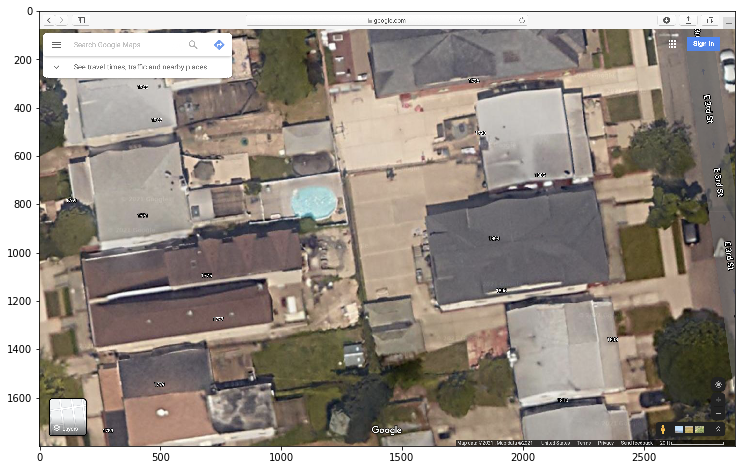

In [9]:
# Show Image
fig, axes = plt.subplots(figsize=(16, 8))

axes.imshow(data)
plt.show()

In [10]:
# Convert Image to 2D – RGB to gray
image = skimage.color.rgb2gray(data)

# Smooth Image
image = ndi.gaussian_filter(image, 5)

# Get Edges
edge_sobel = filters.sobel(image)
edge_roberts = filters.roberts(image)

print(image.shape)

(1800, 2880)


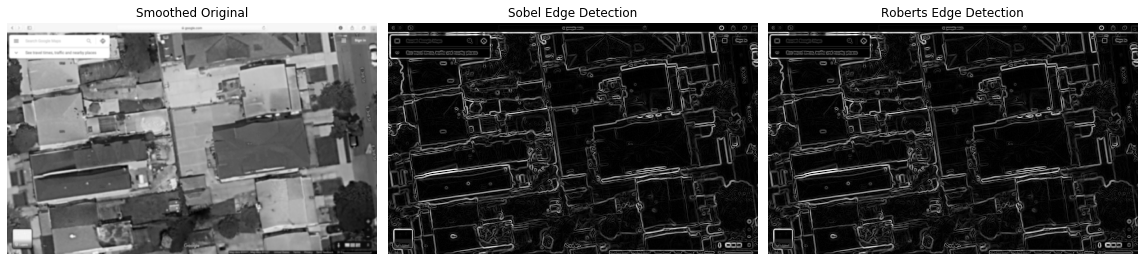

In [11]:
# Display Results
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(16, 8))
  
axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title("Smoothed Original")
                           
axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title("Sobel Edge Detection")

axes[2].imshow(edge_roberts, cmap=plt.cm.gray)
axes[2].set_title("Roberts Edge Detection")

for ax in axes:
    ax.axis('off')

fig.tight_layout()
plt.show()

In [12]:
# Compute Canny Filter
canny_1 = feature.canny(image)
canny_3 = feature.canny(image, sigma=3)

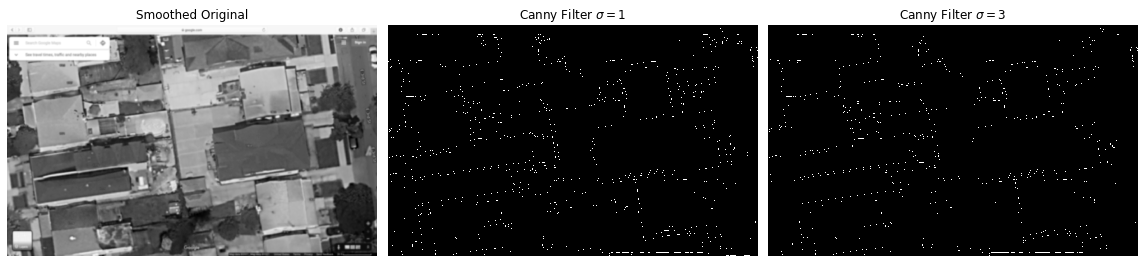

In [13]:
# Display Results
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(16, 8))

axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title("Smoothed Original")

axes[1].imshow(canny_1, cmap=plt.cm.gray)
axes[1].set_title(r'Canny Filter $\sigma=1$')

axes[2].imshow(canny_3, cmap=plt.cm.gray)
axes[2].set_title(r'Canny Filter $\sigma=3$')

for ax in axes:
    ax.axis('off')

fig.tight_layout()
plt.show()

# Results
Edge Detection is really cool! Sobel and Roberts methods are similar and performed better than the Canny Filter. I tried Canny filter with various levels of smoothing and different sigmas, but could not find any satisfactory results. While Sobel and Roberts edge detection do a decent job, they pick up too much noise that doesn't seem to be easy to remove. Sometimes, shadow edges have a more drastic change in light than roof edges! Then, there are trees, cars, sidewalks...

Perhaps I can run roof segmentation and boundary detection methods over the edge detection output, but, from preliminary research, it seems better to go with an RCNN based approach (likely Mask RCNN) from the raw image. Add another one to the project queue!